# 1. Import Libraries

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression
from sklearn.datasets import load_boston 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
%matplotlib inline

# 2. Import training and validation data

In [2]:
X_train = pd.read_csv('../datasets/X_train.csv',header=None)
X_test = pd.read_csv('../datasets/X_test.csv',header=None)
y_train = pd.read_csv('../datasets/y_train.csv',header=None)
y_test = pd.read_csv('../datasets/y_test.csv',header=None)

# 3. Pipeline

## pipeline for lasso model

In [3]:
pipe = Pipeline([
    ('var_thresh', VarianceThreshold(.01)),
    ('ss', StandardScaler()),
    ('kbest', SelectKBest(f_regression, k=95)),
    ('lasso', Lasso())
])

In [4]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('var_thresh', VarianceThreshold(threshold=0.01)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=95, score_func=<function f_regression at 0x1a15a18d90>)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [5]:
pipe.score(X_train, y_train)

0.9143237240453684

In [6]:
pipe.score(X_test, y_test)

0.9117741764780453

In [7]:
params = {
    'var_thresh__threshold': [0, .005, .01, .1],
    'kbest__k': [45,55,65],
    'lasso__alpha': np.linspace(.0001, 10, 7)
}

## pipeline for  model Ridge

In [8]:
pipe2 = Pipeline([
    ('var_thresh', VarianceThreshold(.05)),
    ('ss', StandardScaler()),
    ('kbest', SelectKBest(f_regression, k=95)),
    ('Ridge', Ridge())
])

In [9]:
pipe2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('var_thresh', VarianceThreshold(threshold=0.05)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=95, score_func=<function f_regression at 0x1a15a18d90>)), ('Ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [10]:
pipe2.score(X_train, y_train)

0.9118151072692284

In [11]:
pipe2.score(X_test, y_test)

0.9134693607630084

In [12]:
params2 = {
    'var_thresh__threshold': [0, .005, .01, .1],
    'kbest__k': [45,55,65],
    'Ridge__alpha': np.logspace(-3, 3, 7)
}

## pipeline for  model ElasticNet

In [13]:
pipe3 = Pipeline([
    ('var_thresh', VarianceThreshold(.05)),
    ('kbest', SelectKBest(f_regression, k=95)),
    ('ss', StandardScaler()),
    ('ElasticNet', ElasticNet())
])

In [14]:
pipe3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('var_thresh', VarianceThreshold(threshold=0.05)), ('kbest', SelectKBest(k=95, score_func=<function f_regression at 0x1a15a18d90>)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ElasticNet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])

In [15]:
pipe3.score(X_train, y_train)

0.8608583488019147

In [16]:
pipe3.score(X_test, y_test)

0.8865528428511877

In [17]:
params3 = {
    'var_thresh__threshold': [0, .005, .01, .1],
    'kbest__k': [45,55,65],
    'ElasticNet__alpha': np.logspace(-3, 3, 7),
    'ElasticNet__l1_ratio': np.linspace(0,1,7)
}

# 4. GridSearch

## Lasso GridSearch

In [18]:
gs = GridSearchCV(pipe, params, cv=5) # Lasso

In [19]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('var_thresh', VarianceThreshold(threshold=0.01)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=95, score_func=<function f_regression at 0x1a15a18d90>)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'var_thresh__threshold': [0, 0.005, 0.01, 0.1], 'kbest__k': [45, 55, 65], 'lasso__alpha': array([1.00000e-04, 1.66675e+00, 3.33340e+00, 5.00005e+00, 6.66670e+00,
       8.33335e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
gs.score(X_train,y_train)

0.9055761943119776

In [21]:
gs.score(X_test,y_test)

0.9062938397048785

In [22]:
RMSE = mean_squared_error(y_test, gs.predict(X_test))**0.5

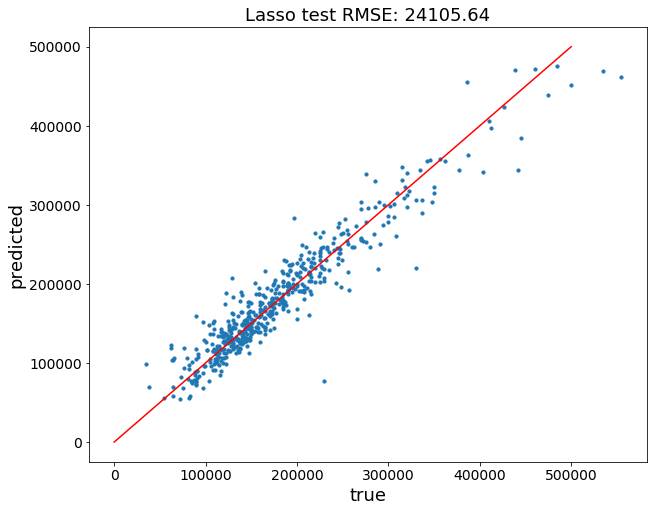

In [23]:
plt.figure(figsize=(10,8))
plt.title(f'Lasso test RMSE: {mean_squared_error(y_test, gs.predict(X_test)) ** .5:.2f}',fontsize=18)
plt.scatter(y_test, gs.predict(X_test),s=10)
plt.ylabel('predicted',fontsize=18)
plt.xlabel('true',fontsize=18)
plt.plot([0, 500000], [0, 500000], color='r',label='Actual')
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

## Ridge GridSearch

In [24]:
gs2 = GridSearchCV(pipe2, params2, cv = 5) # Ridge

In [25]:
gs2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('var_thresh', VarianceThreshold(threshold=0.05)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=95, score_func=<function f_regression at 0x1a15a18d90>)), ('Ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'var_thresh__threshold': [0, 0.005, 0.01, 0.1], 'kbest__k': [45, 55, 65], 'Ridge__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
gs2.score(X_train,y_train)

0.9058050633333605

In [27]:
gs2.score(X_test,y_test)

0.9056600208897883

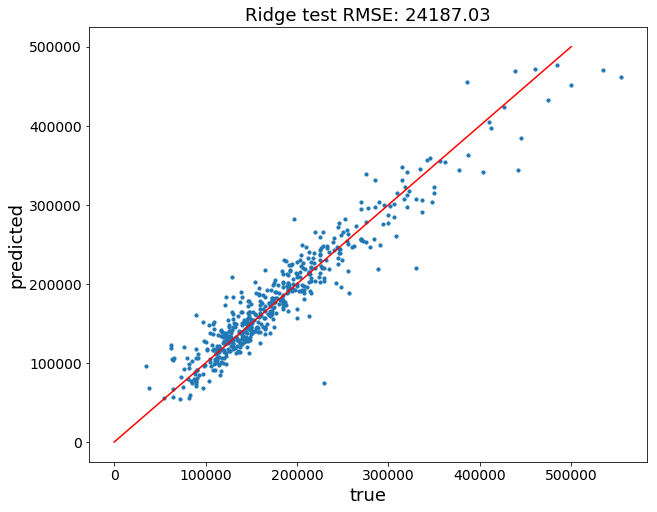

In [28]:
plt.figure(figsize=(10,8))
plt.title(f'Ridge test RMSE: {mean_squared_error(y_test, gs2.predict(X_test)) ** .5:.2f}',fontsize=18)
plt.scatter(y_test, gs2.predict(X_test),s=10)
plt.ylabel('predicted',fontsize=18)
plt.xlabel('true',fontsize=18)
plt.plot([0, 500000], [0, 500000], color='r',label='Actual')
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

## ElasticNet GridSearch

In [29]:
gs3 = GridSearchCV(pipe3, params3, cv=5) # ElasticNet

In [30]:
gs3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('var_thresh', VarianceThreshold(threshold=0.05)), ('kbest', SelectKBest(k=95, score_func=<function f_regression at 0x1a15a18d90>)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ElasticNet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'var_thresh__threshold': [0, 0.005, 0.01, 0.1], 'kbest__k': [45, 55, 65], 'ElasticNet__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'ElasticNet__l1_ratio': array([0.     , 0.16667, 0.33333, 0.5    , 0.66667, 0.83333, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
gs3.score(X_train,y_train)

0.9034918496203588

In [32]:
gs3.score(X_test,y_test)

0.9070026565071627

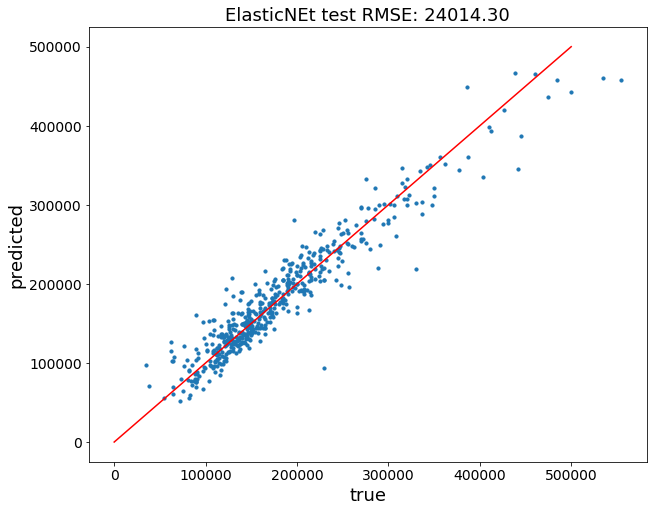

In [33]:
plt.figure(figsize=(10,8))
plt.title(f'ElasticNEt test RMSE: {mean_squared_error(y_test, gs3.predict(X_test)) ** .5:.2f}',fontsize=18)
plt.scatter(y_test, gs3.predict(X_test),s=10)
plt.ylabel('predicted',fontsize=18)
plt.xlabel('true',fontsize=18)
plt.plot([0, 500000], [0, 500000], color='r',label='Actual')
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

# 5. Comparing model performance 

In [96]:
RMSE_Lasso = mean_squared_error(y_test,gs.predict(X_test))**0.5
RMSE_Ridge = mean_squared_error(y_test,gs2.predict(X_test))**0.5
RMSE_ElasticNet = mean_squared_error(y_test,gs3.predict(X_test))**0.5

Text(0.5, 1.0, 'RMSE of three regression models')

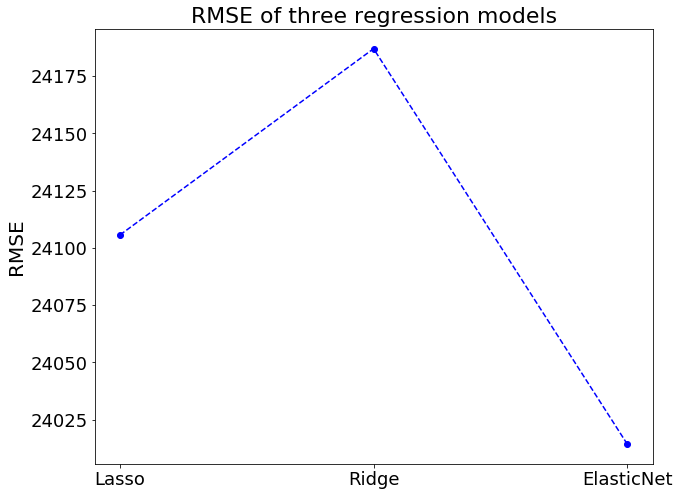

In [122]:

fig, ax = plt.subplots(1,1,figsize=(10,8))  
ax.plot([0,1,2],[RMSE_Lasso,RMSE_Ridge,RMSE_ElasticNet],linestyle='--', marker='o', color='b')


# Set number of ticks for x-axis
ax.set_xticks([0,1,2])
# Set ticks labels for x-axis
ax.set_xticklabels(['Lasso','Ridge','ElasticNet'],  fontsize=18);
plt.yticks(fontsize=18);
plt.ylabel('RMSE',fontsize=20)
plt.title('RMSE of three regression models',fontsize=22)

Three models perform equally good, the Ridge model has slightly smaller RMSE, so we choose the Ridge model as our Production model.

# 6. Model Interpretation 

In [36]:
with open('../assets/columns_1544153112.pkl', 'rb') as f:
    columns = pickle.load(f)

In [37]:
columns = columns[gs2.best_estimator_.named_steps['var_thresh'].get_support()]
columns = columns[gs2.best_estimator_.named_steps['kbest'].get_support()]

betas =pd.DataFrame(gs2.best_estimator_.named_steps['Ridge'].coef_.T, 
                     index = columns, 
                     columns=['weight'])

In [38]:
beta_0 = gs.best_estimator_.named_steps['lasso'].intercept_

In [39]:
beta_0

array([182046.51888021])

In [40]:
betas['abs_weight'] = betas.weight.abs()

In [41]:
weights = betas.sort_values('abs_weight', ascending=False)['weight'].head(20)

In [42]:
labels = weights.sort_values(ascending=False).index

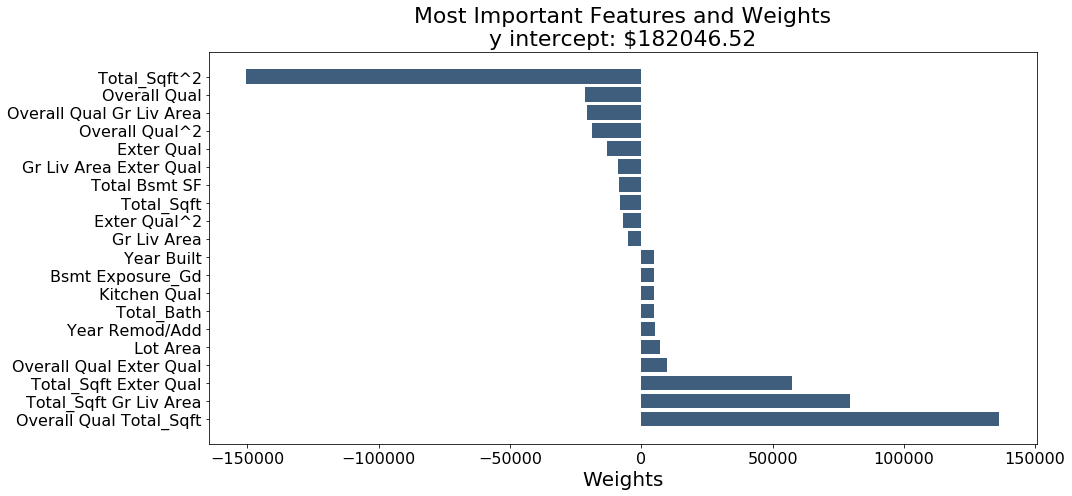

In [43]:
plt.figure(figsize=(15,7))
plt.barh(labels, weights.sort_values(ascending=False), color="#3F5D7D")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Weights', fontsize=20)
plt.title(f'Most Important Features and Weights\ny intercept: ${beta_0[0]:0.02f}', fontsize=22)
plt.tight_layout()

In regression with multiple independent variables, the coefficient tell us how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant. However, if the variables are entered in the multiple regression and those variables are correlated with each other to high degree and correlated to our target variable, then the beta weights for these correlated independent variables are arbitrarily allocated predictive credit among the correlated independent variables.

For example, when the interaction term between `Overall Qual` and `Total_sqft` increase by one, the `SalePrice` increase in about \$1500000. However, the `Total_Sqft^2` increase by one the SalePrice decreased in about $15000 in the same time. Hence, the model's interpretability decreased since main effects becoming insignificant when we add interactions. 

### Remove interaction terms, show the coefficients of variables

In [64]:
beta_sig = betas[~betas.index.str.contains('Overall')]
beta_sig = beta_sig[~beta_sig.index.str.contains('Total_Sqft')]
beta_sig = beta_sig[~beta_sig.index.str.contains('Gr Liv Area')]
beta_sig = beta_sig[~beta_sig.index.str.contains('Exter Qual')]

In [74]:
weights_sig.values

array([-8644.76127174,  7284.53651003,  5331.8691153 ,  4986.5295856 ,
        4805.77276633,  4726.49837478,  4713.37042197,  4423.81539671,
       -4409.88864414,  3966.67508103,  3940.36411091,  2906.81907939,
        2900.83017248,  2509.44990204,  2445.99491965,  2302.99541434,
        2173.37283874,  2030.70465623,  1982.61717555, -1971.3555348 ])

In [84]:
weights_sig = beta_sig.sort_values('abs_weight', ascending=False)['weight'].head(20)
labels = weights_sig.sort_values(ascending=False).index

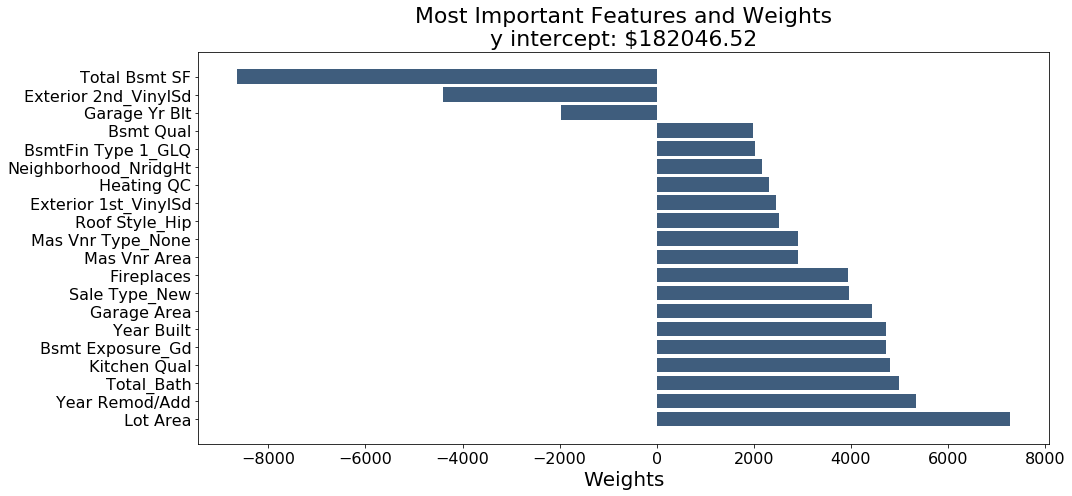

In [85]:
plt.figure(figsize=(15,7))
plt.barh(labels, weights_sig.sort_values(ascending=False), color="#3F5D7D")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Weights', fontsize=20)
plt.title(f'Most Important Features and Weights\ny intercept: ${beta_0[0]:0.02f}', fontsize=22)
plt.tight_layout()

If we exclude Interaction terms, the 

In [44]:
with open('../assets/gs_model.pkl', 'wb+') as f:
    pickle.dump(gs2, f)